# Airbnb Toronto Listings

Guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

Airbnb currently has more than 5 million hosts and more than 7.7 million active listings. Some of these listings are highly profitable and some are not. In this exploratory project, we are driven in identifying factors that contributes to an Airbnb listing's success. This repository dives into the world of Airbnb listings in Toronto. 
Perform EDA along with basic supervised and unsupervised machine learning algorithms such as linear regression and provide answers to the following questions:
<ol>
<li>What is the distribution of super host?</li>
<li>How are the listings distributed in Toronto? Are certain neighbourhoods have more listings than others?</li>
<li>What is the distribution of property type and room type inToronto?</li>
<li>What are the common amenities offered in the listings?</li>
<li>Is there any relationship between bedrooms and price?</li>
<li>Are certain neighbourhoods priced more than others?</li>
<li>Is there any relationship between property type and price?</li>
<li>Is there a relationship between accommodations and price?</li>
<li>Which property types have higher price?</li>
<li>Is there a certain relationship between number of reviews and price?</li>
<li>Do customers prefer lower minimum nights or higher minimum nights?</li>
<li>Is there a relationship between price and average number of reviews per month?</li>
<li>Is there a relationship between price and average number of reviews per month?</li>
</ol>

##### Import the necessary libraries

In [456]:
import pandas as pd
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
#options.display.max_colwidth
pd.set_option("display.max_colwidth",None)

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-muted')
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import folium
import json
from operator import itemgetter
from tabulate import tabulate
from wordcloud import WordCloud

### Dataset

Am going to read the first 20 rows and see how many columns are there in the dataset.

In [411]:
dftest = pd.read_csv("listings.csv",nrows=20)

In [413]:
dftest.shape

(20, 75)

In [415]:
dftest.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

There are 75 columns. Making a list of columns that are necessary for answering the above questions and importing again all the rows in the dataset.

In [418]:
col_list = ['host_location', 'host_is_superhost', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'accommodates', 'bathrooms','bathrooms_text','bedrooms','latitude','longitude', 
       'amenities', 'price', 'minimum_nights', 'maximum_nights','minimum_minimum_nights','maximum_minimum_nights',
       'calculated_host_listings_count','number_of_reviews', 'review_scores_value', 'reviews_per_month']

In [420]:
df = pd.read_csv("listings.csv",usecols=col_list)
df.head(2)

,host_location,host_is_superhost,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,number_of_reviews,review_scores_value,calculated_host_listings_count,reviews_per_month
0,"Vancouver, Canada",f,Little Portugal,43.6459,-79.42423,Entire home,Entire home/apt,10,NaN,3 baths,5.0,"[""Shampoo"", ""Wifi"", ""TV"", ""Essentials"", ""Smoke alarm"", ""Fire extinguisher"", ""Kitchen"", ""Dryer"", ""Heating"", ""Air conditioning"", ""First aid kit"", ""Washer"", ""Indoor fireplace""]",NaN,28,730,28,28,6,5.00,1,0.06
1,"Toronto, Canada",f,Waterfront Communities-The Island,43.6408,-79.37673,Private room in rental unit,Private room,2,NaN,1.5 baths,NaN,"[""Shampoo"", ""Wifi"", ""Elevator"", ""Free parking on premises"", ""Smoke alarm"", ""Gym"", ""TV with standard cable"", ""Heating"", ""Air conditioning"", ""Pool""]",NaN,180,365,180,180,169,4.83,2,0.94


In [422]:
df.shape

(20843, 21)

In [424]:
#Percentage of null values in the columns
round(df.isnull().sum()/df.shape[0]*100,2)

host_location                     25.75
host_is_superhost                  1.88
neighbourhood_cleansed             0.00
latitude                           0.00
longitude                          0.00
property_type                      0.00
room_type                          0.00
accommodates                       0.00
bathrooms                         25.26
bathrooms_text                     0.03
bedrooms                           7.24
amenities                          0.00
price                             25.24
minimum_nights                     0.00
maximum_nights                     0.00
minimum_minimum_nights             0.00
maximum_minimum_nights             0.00
number_of_reviews                  0.00
review_scores_value               26.26
calculated_host_listings_count     0.00
reviews_per_month                 26.15
dtype: float64

##### Utility Functions

In [426]:
#Utility Funcions
def get_nan_cols(df, nan_percent=0.8):
    threshold = len(df.index) * nan_percent
    return [c for c in df.columns if df[c].isnull().sum() >= threshold]

def price_categories(x):
    if x <= 90 :
        return "Low"
    if x>90 and x<=148:
        return "Medium"
    if x>148 and x<=221:
        return "TowardsHigh"
    if x>221 and x<=999:
        return "High"
    else:
        return "ExtermelyHigh"

def create_colors(x):
    #copy df to new - original data are not changed
    df1 = x.copy()
    #select all values to default value - no color
    df1.loc[:,:] = 'background-color: '
    #overwrite values with green and red color
    df1.loc[:1] = 'background-color: lightgreen'
    df1.loc[1:13] = 'color: darkgreen'
    df1.loc[13:38] = 'color: darkblue'
    df1.loc[38:117] = 'color: red'
    df1.loc[117:] = 'background-color: red'
    #return color df
    return df1 
def get_amenities_dict(N):
    for i in ammlist[:N]:
        my_str = i.replace('[','').replace("]",'')
        my_str = my_str.replace('"','')
        my_list = my_str.split(',')
        for word in my_list:
            if word in amm_dict:
                amm_dict[word] += 1
            else:
              amm_dict[word] = 1   

def get_N_largest_ammenities(d,N):
    temp_dict = dict(sorted(d.items(), key=itemgetter(1), reverse=True)[:N])
    temp_df = pd.DataFrame.from_dict(temp_dict,orient='index')
    temp_df.columns = ["Values"]
    return temp_df

In [428]:
#remove columns with more than 40% values
cols_to_del = get_nan_cols(df, 0.4)
df = df.drop(columns=cols_to_del)

In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20843 entries, 0 to 20842
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_location                   15475 non-null  object 
 1   host_is_superhost               20452 non-null  object 
 2   neighbourhood_cleansed          20843 non-null  object 
 3   latitude                        20843 non-null  float64
 4   longitude                       20843 non-null  float64
 5   property_type                   20843 non-null  object 
 6   room_type                       20843 non-null  object 
 7   accommodates                    20843 non-null  int64  
 8   bathrooms                       15579 non-null  float64
 9   bathrooms_text                  20836 non-null  object 
 10  bedrooms                        19335 non-null  float64
 11  amenities                       20843 non-null  object 
 12  price                           

As we can see above price column is of object datatype. Removing '$' and ',' from price column and converting to float.
Renaming the 'neighbourhood_cleansed' column to 'neighbourhood'. Imputing price null values with average price of the neighbourhood it is in.

In [432]:
# Converting price column which is a object to float.
df['price'] = df['price'].str[1:].str.replace(',','').astype('float')
#As neighbourhood_cleansed column contains all the neighbourhood data renaming it
df.rename(columns={"neighbourhood_cleansed":"neighbourhood"},inplace=True)
#Imputing price with average values from that neighbourhood.
df['price'] = df.groupby("neighbourhood")['price'].transform(lambda x: x.fillna(round(x.mean(),2)))
df['price'] = df['price'].astype('int')
dfr = df.copy(deep=True)

Imputing the bathroom column null values with number of bathrooms from bathrooms_text columns and then dropping the bathroom_text column.

In [434]:
dfr = dfr.drop(dfr[dfr['bathrooms_text'].isnull()].index)
dfr = dfr.drop(dfr.loc[dfr.bathrooms >10].index)
dfr.loc[dfr.bathrooms_text == "Half-bath",'bathrooms']=0.5
dfr.loc[((dfr.bathrooms.isnull())&(dfr.bathrooms_text == "Shared half-bath")) ,'bathrooms']=0.5
dfr.loc[((dfr.bathrooms.isnull())&(dfr.bathrooms_text == "Private half-bath")) ,'bathrooms']=0.5
dfr.loc[dfr.bathrooms.isnull(),'bathrooms']=dfr.loc[dfr.bathrooms.isnull(),'bathrooms_text'].str.split().str[0].astype('float')
dfr.drop("bathrooms_text",axis=1,inplace=True)

Getting the Toronto data and the other GTA area into different datframes because of memory constraints and combining into one. Also creating another column 'price_category' based on the price into 'Low','Medium','High'....

In [436]:
dfTor = dfr[dfr['host_location'] == "Toronto, Canada"]
dfOth = dfr[(dfr['host_location'] == "Mississauga, Canada") | (dfr['host_location'] == "Vaughan, Canada") | (dfr['host_location'] == "Markham, Canada") |
(dfr['host_location'] == "Ontario, Canada") | (dfr['host_location'] == "Brampton, Canada") | (dfr['host_location'] == "Oakville, Canada")]
dfAll = pd.concat([dfTor, dfOth])
dfAll["price_category"] = dfAll["price"].apply(price_categories)

### Distribution of price

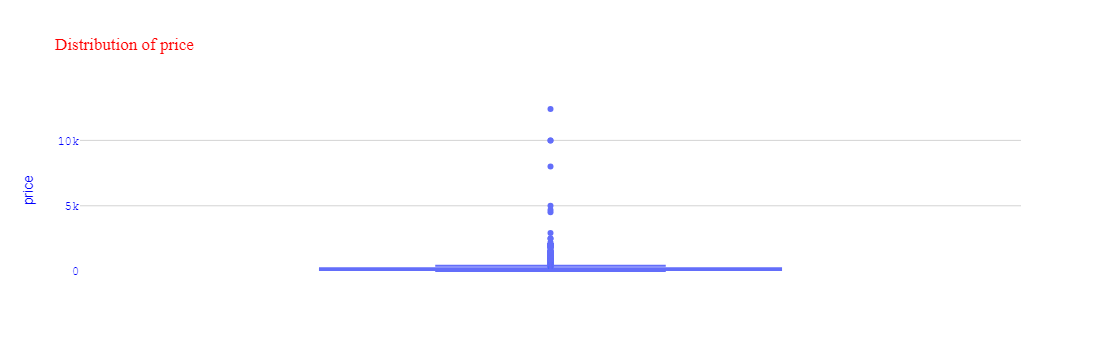

In [439]:
import plotly.express as px
fig = px.box(dfAll, y="price",title="Distribution of price")
fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    plot_bgcolor='white'
)
fig.update_yaxes(title_font_family="Arial",gridcolor='lightgrey')
fig.show()

Generate descriptive statistics of price column.

Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [441]:
dfAll['price'].describe()

count    14353.000000
mean       183.671846
std        243.774459
min         14.000000
25%         90.000000
50%        149.000000
75%        221.000000
max      12400.000000
Name: price, dtype: float64

Maximum value of price is $12400 &  75% of data is below $221. Considering rows with price less than $1000 and plotting the distribution again.

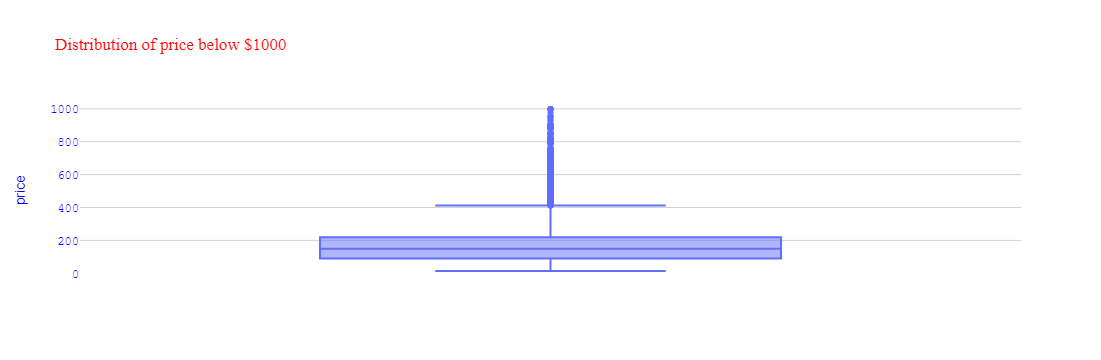

In [444]:
dfAll = dfAll[dfAll.price <1000]
fig = px.box(dfAll, y="price",title="Distribution of price below $1000")
fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    plot_bgcolor='white'
)
fig.update_yaxes(title_font_family="Arial",gridcolor='lightgrey')
fig.show()

Any data points which lies beyond upper and lower fence of a data set are considered an outliers. Upper fence is $412 dollars.

### 1.What is the distribution of super host?

host_is_superhost
f    63.4
t    36.6
Name: proportion, dtype: float64


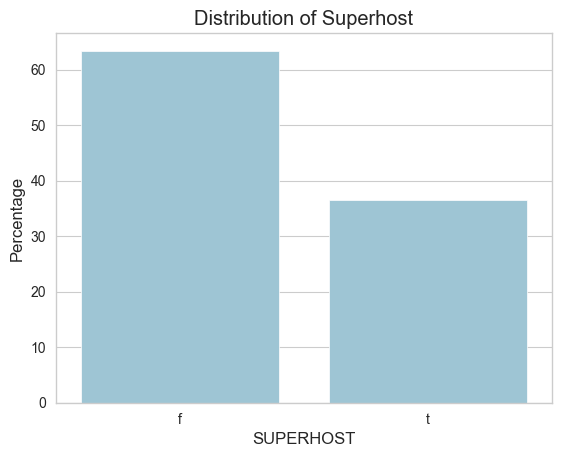

In [474]:
dfA = dfAll.copy(deep=True)
superhost = round(dfA['host_is_superhost'].value_counts(normalize=True)*100,2)
print(superhost)
ax =sns.barplot(superhost,color="skyblue",saturation=0.55)
ax.set(xlabel='SUPERHOST', ylabel='Percentage', title="Distribution of Superhost")
plt.show()

##### What does Superhost mean on Airbnb?

Airbnb defines Superhosts as “the top-rated, most experienced hosts on Airbnb, committed to providing you with outstanding hospitality.” To become one, you'll have to meet a range of certain requirements set by Airbnb.

##### What is the Airbnb Superhost criteria?
To qualify to be a Superhost, you’ll have to be a primary Host and meet the following criteria:

Response rate: You must have a 90% or higher response rate (within 24hrs)
Number of stays: You must have completed 10+ stays that equal 100 nights or more
Cancelation rate: A cancellation rate of 1% or lower
Overall rating: A 4.8+ rating for the past 365 days

###### <b>36.72 % of hosts meet the Airbnb Superhost criteria and 63.28 % do not.</b>

### 2.How are the listings distributed in Toronto? Are certain neighbourhoods have more listings than others?

In [476]:
neighs = dfTor.groupby('neighbourhood')['neighbourhood'].count().sort_values(ascending=False)
neighsdf = pd.DataFrame({"neighbourhood":neighs.index,"listings":neighs.values})
neighsdf.style.apply(create_colors, axis=None)

,neighbourhood,listings
0,Waterfront Communities-The Island,1968
1,Niagara,552
2,Annex,405
3,Trinity-Bellwoods,387
4,Dovercourt-Wallace Emerson-Junction,371
5,Church-Yonge Corridor,367
6,Little Portugal,322
7,Moss Park,319
8,Kensington-Chinatown,306
9,Bay Street Corridor,291


Waterfront Communities-The Island seems to be extremely popular and has 1968 listings way ahead of Niagara which has only 552 listings.<br>
As we can see the neighbourhoods in green have more than 200 listings.<br>
The neighbourhoods in blue have between 100 and 200 listings.<br>
The neighbourhoods in red have less than 100 listings.<br>

### 3.What is the distribution of property type and room type in Toronto?

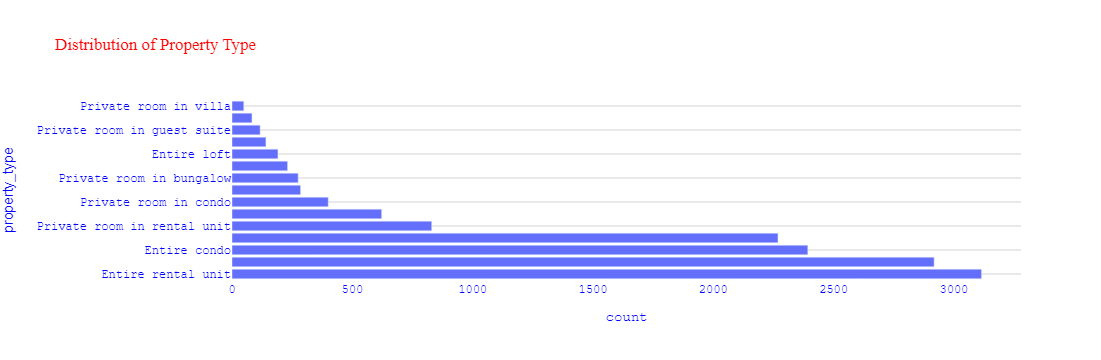

In [478]:
#disribution property type
ser = dfA['property_type'].value_counts()[:15] #room_type
dfPrTy = ser.to_frame().reset_index() 
import plotly.express as px
fig = px.bar(dfPrTy, x="count", y="property_type", orientation='h',title ="Distribution of Property Type")
fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    plot_bgcolor='white'
    #legend_title_font_color="green"
)
fig.update_yaxes(title_font_family="Arial",gridcolor='lightgrey')
fig.show()

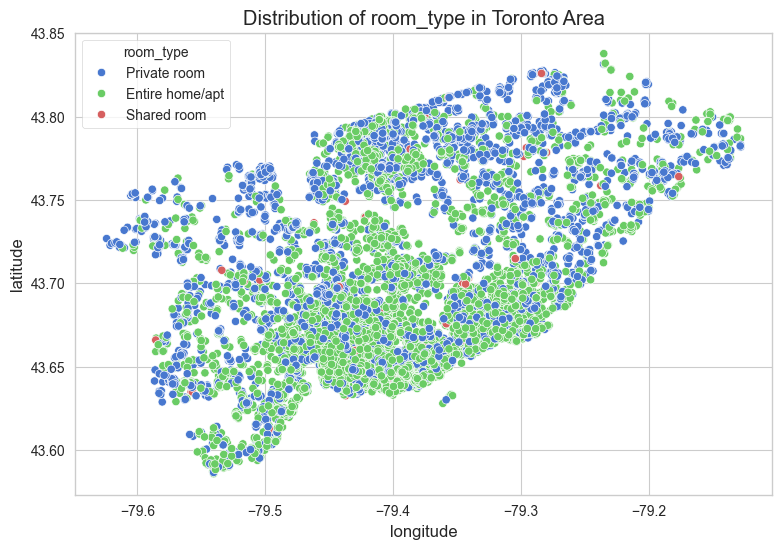

In [480]:
plt.figure(figsize=(9,6))
#plt.rcParams["figure.facecolor"] = "w"
sns.set_style('whitegrid')
sns.scatterplot(dfTor,x=dfTor.longitude,y=dfTor.latitude,hue=dfTor.room_type)
plt.ioff()
plt.title("Distribution of room_type in Toronto Area")
plt.show()

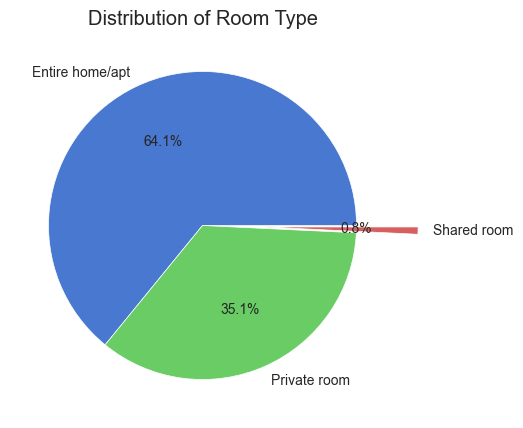

In [484]:
# distribution of the room type
room_type =dfA['room_type'].value_counts()
sns.set_style("whitegrid")
#plt.style.use("ggplot")
plt.figure(figsize = [5, 5], clear = True, facecolor = "white")
explode = [0, 0,   0.4]
plt.pie(room_type.values, labels=room_type.index, explode = explode,autopct='%1.1f%%')#,shadow = True
plt.title('Distribution of Room Type')
plt.show()

Property type distribution:<br>
We see entire rental units are most in the market, followed by a private room in home. <br>
Room type distribution:<br>
64.3 % of rentals are Entire home/apt while 35% have  rented out a private room.<br>
It looks like people are not comfortable sharing a room. Only 0.8% have availed this form of accommodation
.<br>

### 4.What are the common amenities offered in the listings?

In [486]:
# First 2 rows of amenities 
dfA.amenities[:2]

1    ["Shampoo", "Wifi", "Elevator", "Free parking on premises", "Smoke alarm", "Gym", "TV with standard cable", "Heating", "Air conditioning", "Pool"]
2                                                                   ["Wifi", "Elevator", "Kitchen", "TV with standard cable", "Gym", "Heating", "Pool"]
Name: amenities, dtype: object

As seen above the amenities column is by itself a pandas series with index and values as list. So converting the column to list and getting the first value for sample.

In [488]:
ammlist = dfA['amenities'].values.tolist()
ammlist[:1]

['["Shampoo", "Wifi", "Elevator", "Free parking on premises", "Smoke alarm", "Gym", "TV with standard cable", "Heating", "Air conditioning", "Pool"]']

Created a function to get the amenities as dictionary keys and frequency of the amenities as values.
Running the function to get frequency of occurences of the amenities for the first 2000 rows and displaying the dictionary.

In [491]:
amm_dict = {}
get_amenities_dict(2000)
print(amm_dict)

{'Shampoo': 1278, ' Wifi': 1550, ' Elevator': 717, ' Free parking on premises': 670, ' Smoke alarm': 1857, ' Gym': 471, ' TV with standard cable': 558, ' Heating': 1758, ' Air conditioning': 1294, ' Pool': 224, 'Wifi': 279, ' Kitchen': 1857, ' Sound system with Bluetooth and aux': 5, ' Bathtub': 406, ' Hair dryer': 1226, ' Drying rack for clothing': 164, ' Ethernet connection': 161, ' Luggage dropoff allowed': 455, ' Conditioner': 251, ' Dishwasher': 556, ' Free street parking': 213, ' BBQ grill': 262, ' Portable fans': 211, ' Coffee': 266, ' Iron': 1298, ' Room-darkening shades': 313, ' Piano': 43, ' Carbon monoxide alarm': 1595, ' Pool table': 15, ' Extra pillows and blankets': 645, ' Hangers': 1433, ' Microwave': 882, ' Stove': 632, ' Dishes and silverware': 1047, ' Rice maker': 95, ' Body soap': 332, ' Coffee maker': 702, ' Dining table': 366, ' Books and reading material': 218, ' Dedicated workspace': 647, ' Clothing storage: closet and dresser': 132, ' Indoor fireplace': 224, ' O

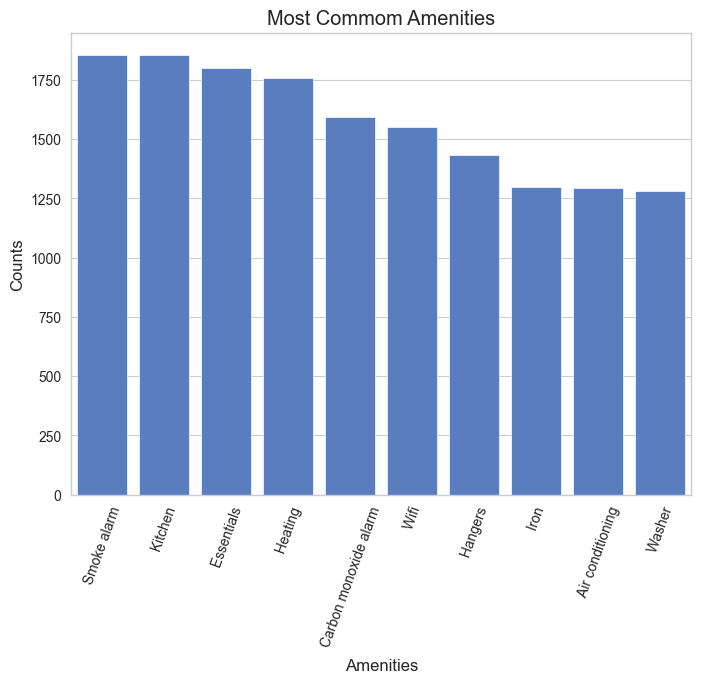

In [493]:
res_df = get_N_largest_ammenities(amm_dict,10)
fig = plt.figure(figsize=(8,6))
sns.barplot(res_df,x=res_df.index, y="Values")
plt.xticks(rotation=70)
plt.title("Most Commom Amenities")
plt.xlabel("Amenities")
plt.ylabel("Counts")
plt.show()

Kitchen, Smoke alarm, Heating, Essentials, Wifi are some of the common amenities  offered by Airbnb rentals.

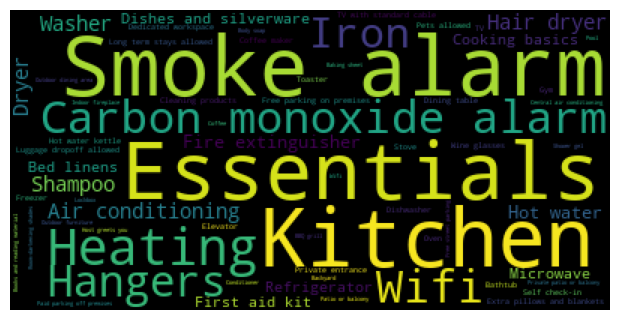

In [495]:
#!pip install wordcloud
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=amm_dict)
# plt.imshow(wordcloud, interpolation="bilinear")
# plot the WordCloud image                      
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### 5.Is there any relationship between bedrooms and price?

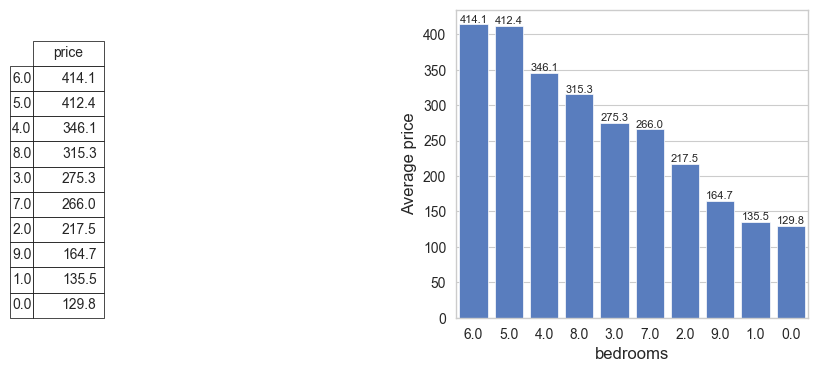

In [497]:
dfbp = dfA.loc[dfA.bedrooms <= 10] 
dfbp = dfbp.groupby('bedrooms')['price'].mean().sort_values(ascending = False).round(1).to_frame()
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.axis('off')
bbox= [0,0,0.2,0.9]
ax1.table(cellText= dfbp.values, rowLabels= dfbp.index, colLabels= dfbp.columns,bbox=bbox)

ax2= fig.add_subplot(122)
ax2 = sns.barplot(data=dfbp,x=dfbp.index, y="price",order = dfbp.index)
for bars in ax2.containers:
        ax2.bar_label(bars, fmt='%.1f',label_type='edge', size= 8)
ax2.set_ylabel('Average price')
plt.show()

In general, as the bedrooms increase, the average price increases. In this dataset the average price is most for a home with 6 bedrooms.
The average price with no bedrooms(may be studio) is only about $6 less than homes with 1 bedroom.

### 6.Are certain neighbourhoods priced more than others?

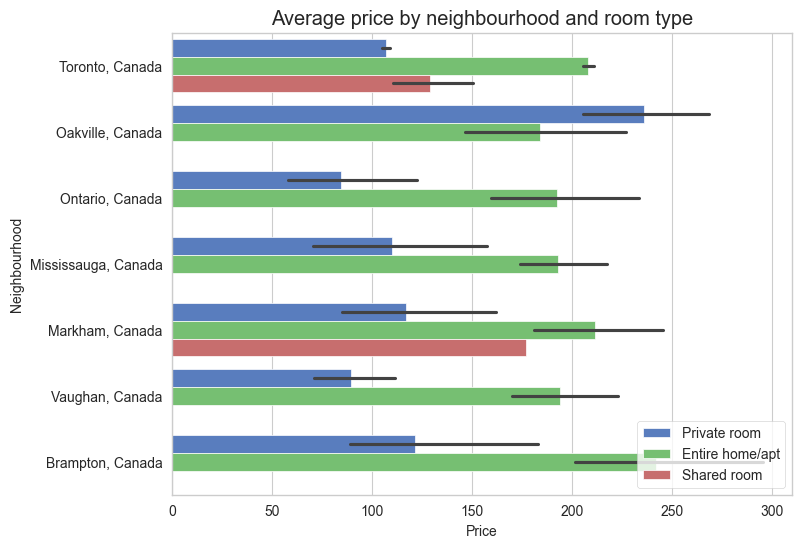

In [501]:
# Average price by neighbourhood and room type
plt.figure(figsize=(8,6))
sns.barplot(y= 'host_location', x= 'price',data= dfA, hue = 'room_type')#, palette='Accent',ci=None)
plt.title('Average price by neighbourhood and room type')
plt.xlabel("Price", size=10)
plt.ylabel("Neighbourhood", size=10)
# plt.xticks(rotation = 'vertical')
plt.legend(loc = 'lower right')
plt.show()

Interesting findings for GTA neighborhoods. Average price is the most for a entire home/apt in Brampton followed by Toronto Canada.
Oakville rents for Private rooms are the highest. Way more than the rest.
Markham has the highest average price for Shared room.

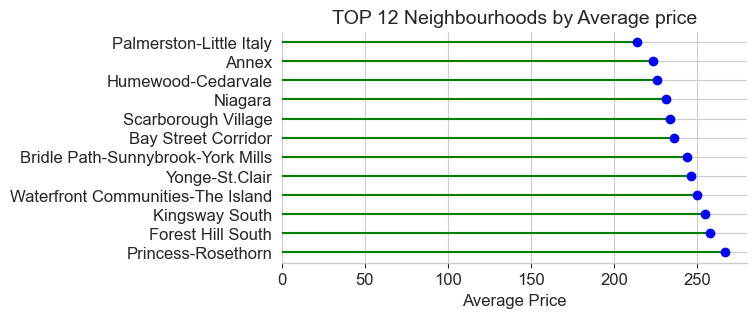

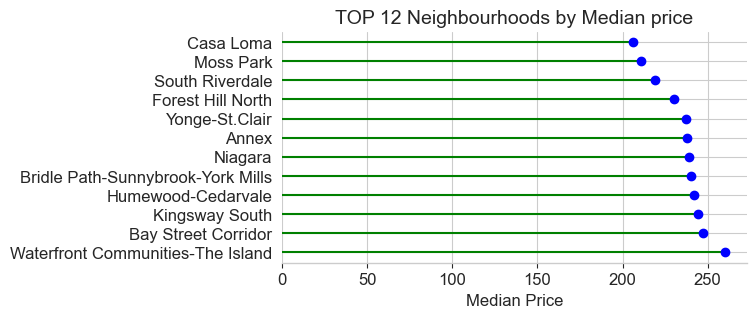

In [503]:
dfNP = dfA.groupby('neighbourhood')['price'].mean().sort_values(ascending = False).round(1).to_frame()
dfNP.columns = ['average_price']
dfNP = dfNP[:12]
plt.figure(figsize=(6,3))
plt.hlines(y=dfNP.index, xmin=0, xmax=dfNP,
            color='green')
plt.plot(dfNP, dfNP.index,'o',color='blue')
plt.title('TOP 12 Neighbourhoods by Average price', fontsize=14)
plt.xlabel('Average Price', fontsize=12)
plt.xticks(fontsize=12)
plt.xlim(0, None)
plt.ylabel(None)
plt.yticks(fontsize=12)
sns.despine(left=True)
plt.grid(True)
plt.tick_params(bottom=True, left=False)
plt.show()

dfNPM = dfA.groupby('neighbourhood')['price'].median().sort_values(ascending = False).round(1).to_frame()
dfNPM.columns = ['Median_price']
dfNPM = dfNPM[:12]
plt.figure(figsize=(6,3))
plt.hlines(y=dfNPM.index, xmin=0, xmax=dfNPM,
            color='green')
plt.plot(dfNPM, dfNPM.index,'o',color='blue')
plt.title('TOP 12 Neighbourhoods by Median price', fontsize=14)
plt.xlabel('Median Price', fontsize=12)
plt.xticks(fontsize=12)
plt.xlim(0, None)
plt.ylabel(None)
plt.yticks(fontsize=12)
sns.despine(left=True)
plt.grid(True)
plt.tick_params(bottom=True, left=False)
plt.show()

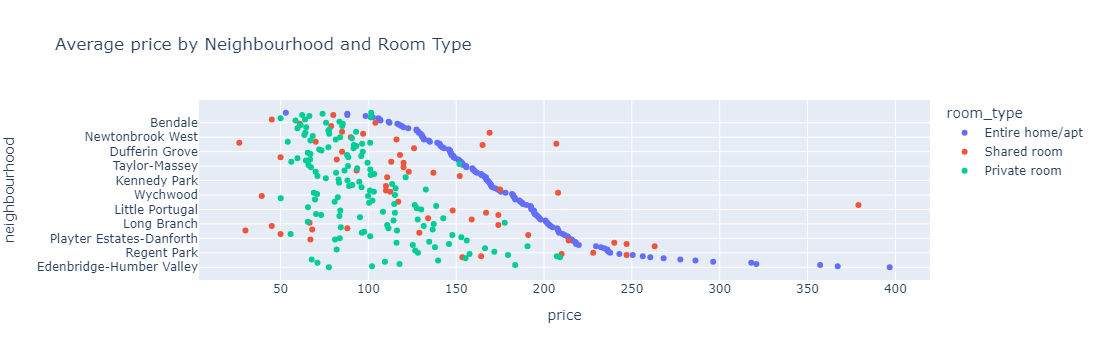

In [505]:
dfNRP=dfA.groupby(['neighbourhood','room_type'])['price'].mean().sort_values(ascending = False).round(1).reset_index()
plt.figure(figsize=(10,8))
fig = px.scatter(dfNRP, x="price", y="neighbourhood", color="room_type",
                 title="Average price by Neighbourhood and Room Type "
                 #,labels={"salary":"Annual Salary (in thousands)"} # customize axis label
                )
fig.show()

<Figure size 1000x800 with 0 Axes>

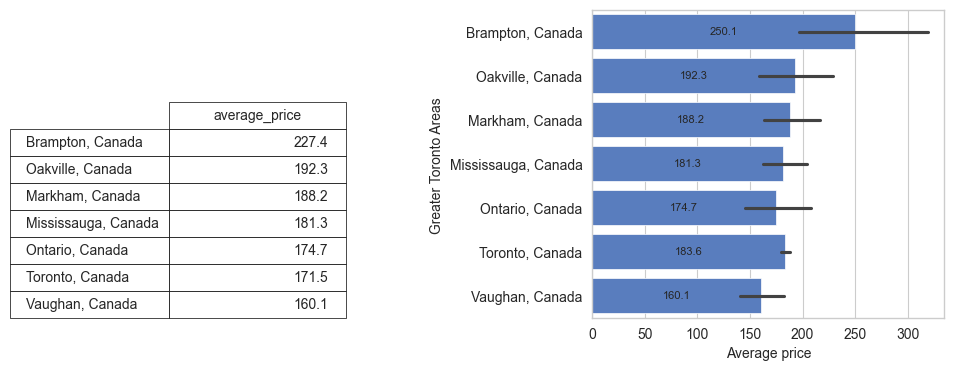

In [507]:
df1 = dfA.groupby('host_location')['price'].mean().sort_values(ascending = False).round(1).to_frame()
df1.columns = ['average_price']

fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(121)
ax1.axis('off')
bbox= [0,0,0.5,0.7]
ax1.table(cellText= df1.values, rowLabels= df1.index, colLabels= df1.columns,bbox=bbox)

ax2= fig.add_subplot(122)
ax2 = sns.barplot(y= 'host_location', x= 'price',data= df,  
              order =  df1.index)
# splot=sns.barplot(x='neighbourhood',y='price',data=df, hue = 'room_type')
plt.ylabel("Greater Toronto Areas ", size=10)
plt.xlabel("Price", size=10)
# plt.xticks(rotation = 'vertical')
for bars in ax2.containers:
        ax2.bar_label(bars, fmt='%.1f',label_type='center', size= 8)
ax2.set_xlabel('Average price')
plt.show()

### 7.Is there any relationship between property type and price?

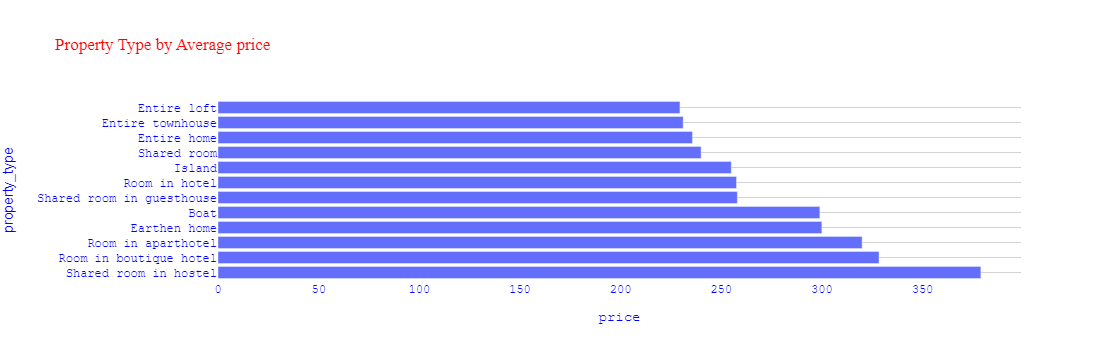

In [509]:
dfPrP = dfA.groupby(['property_type'])['price'].mean().sort_values(ascending=False).round(1).to_frame()
dfp = dfA.groupby(['property_type'])['price'].mean().sort_values(ascending=False).round(1).reset_index()
#dfPrP
dfp =dfp.head(12)
fig = px.bar(dfp, x='price', y='property_type',title = "Property Type by Average price")
fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    plot_bgcolor='white'
    #legend_title_font_color="green"
)
fig.update_yaxes(title_font_family="Arial",gridcolor='lightgrey')
fig.show()

'Shared room in hostel' has average price of $379. 
It could be because we are getting the average of price and the number of listings could be very few.
Let's check.

In [514]:
dfA[dfA.property_type == 'Shared room in hostel'].shape

(3, 21)

Only 3 rows are of property_type -'Shared room in hostel'. Getting frequency counts of property_type and ultimately getting top 7.

In [512]:
dfA.property_type.value_counts()[:11]

property_type
Entire rental unit             3115
Private room in home           2918
Entire condo                   2393
Entire home                    2269
Private room in rental unit     830
Entire guest suite              622
Private room in condo           400
Private room in townhouse       285
Private room in bungalow        275
Entire townhouse                231
Entire loft                     191
Name: count, dtype: int64

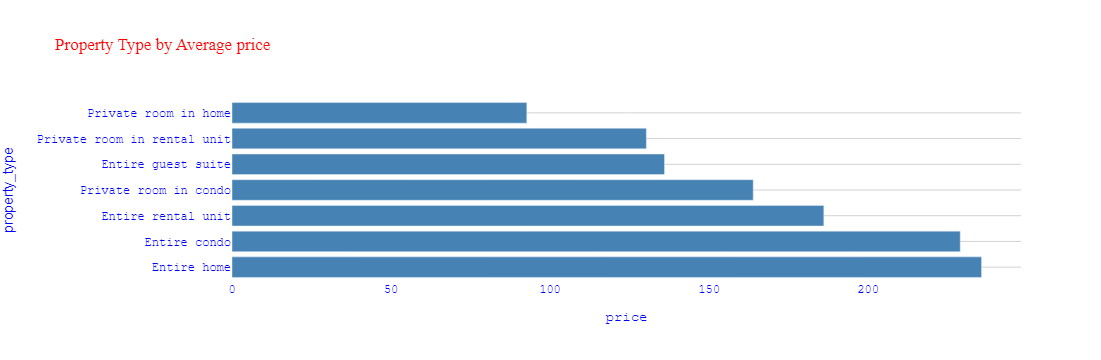

In [518]:
prop_type_list =dfA.property_type.value_counts()[:7].index.tolist()
dfplist = dfA[dfA.property_type.isin(prop_type_list)]
dfPrP = dfplist.groupby(['property_type'])['price'].mean().sort_values(ascending=False).round(1).to_frame()
dfplist = dfplist.groupby(['property_type'])['price'].mean().sort_values(ascending=False).round(1).reset_index()
fig = px.bar(dfplist, x='price', y='property_type',title = "Property Type by Average price")
fig.update_traces(marker_color='steelblue')
fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    plot_bgcolor='white'
    #legend_title_font_color="green"
)
fig.update_yaxes(title_font_family="Arial",gridcolor='lightgrey')
fig.show()

People prefer to rent Entire home, Entire condo and Entire rental unit. May be because they are on family vacation and entire home accommodates more people at once.

### 8.Is there a relationship between accommodations and price?

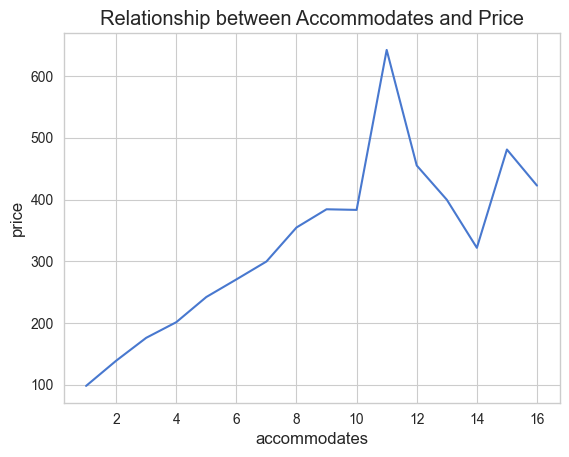

In [521]:
dfAccP = dfA.groupby('accommodates')['price'].mean().round(1).to_frame()
sns.lineplot(data=dfAccP,x=dfAccP.index, y= "price")
plt.title("Relationship between Accommodates and Price")
plt.show()

In general as rental property accommodates more people, the prices increases.

### 9.Which property types have higher price?

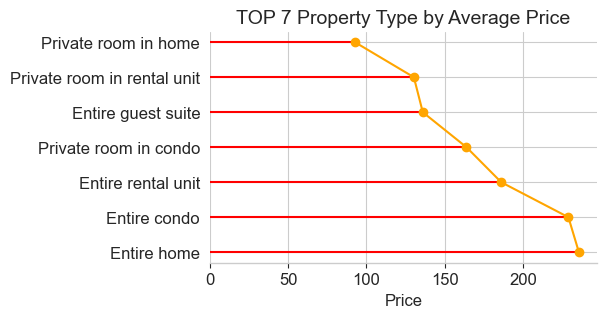

In [526]:
dfPrPTop10 = dfPrP.head(7)
plt.figure(figsize=(5,3))
plt.hlines(y=dfPrPTop10.index, xmin=0, xmax=dfPrPTop10,
            color='red')
plt.plot(dfPrPTop10, dfPrPTop10.index,marker='o',color='orange')
plt.title('TOP 7 Property Type by Average Price', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.xticks(fontsize=12)
plt.xlim(0, None)
plt.ylabel(None)
plt.yticks(fontsize=12)
sns.despine(left=True)
plt.grid(True)
plt.tick_params(bottom=True, left=False)
plt.show()

### 10.Is there a certain relationship between number of reviews and price?

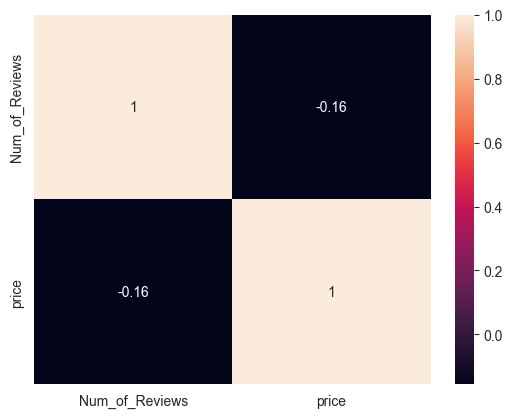

In [528]:
nuRePr = dfA.groupby('number_of_reviews')['price'].mean().round(1).sort_values(ascending=False)#.value_counts()	
dfnuRePr = pd.DataFrame({"Num_of_Reviews":nuRePr.index,"price":nuRePr.values})
cor_mat =dfnuRePr.corr()
sns.heatmap(cor_mat,annot=True)
plt.show()

Little bit of negative corelation between number of reviews and price. We can conclude number of reviews does not affect price.

### 11.Do customers prefer lower minimum nights or higher minimum nights?

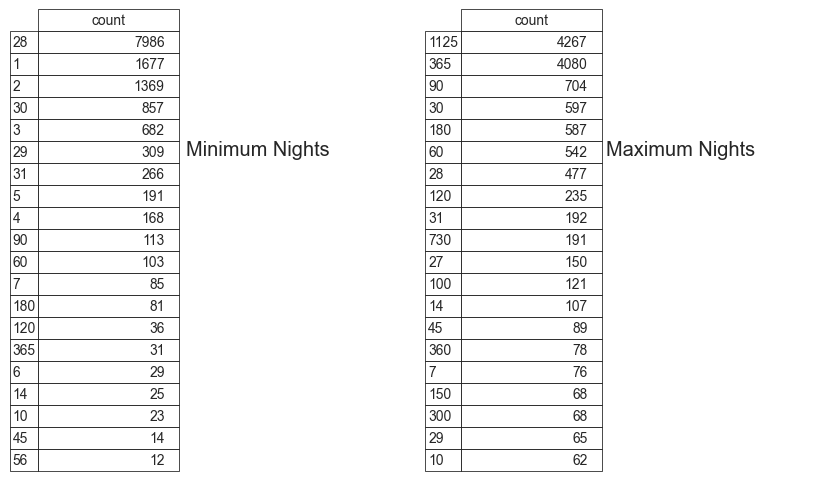

In [530]:
dfMin = dfA.minimum_nights.value_counts().sort_values(ascending=False)[:20].to_frame()
dfMax = dfA.maximum_nights.value_counts().sort_values(ascending=False)[:20].to_frame()
#dfbp = dfbp.groupby('bedrooms')['price'].mean().sort_values(ascending = False).round(1).to_frame()
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
#ax1.set_title("Minimum Nights")
ax1.axis('off')
#ax1.text(-100,-100,"vx")
bbox= [0,0,0.4,1.5]
ax1.table(cellText= dfMin.values, rowLabels= dfMin.index, colLabels= dfMin.columns,bbox=bbox)

ax2= fig.add_subplot(122)
ax2.axis('off')
bbox= [0,0,0.4,1.5]
ax2.table(cellText= dfMax.values, rowLabels= dfMax.index, colLabels= dfMax.columns,bbox=bbox)
#ax2.set_title("Maximum Nights")
#ax2.set_ylabel('Average price')
#plt.title("Min")
ax1.set_title("                Minimum Nights")
ax2.set_title("                Maximum Nights")    
plt.show()

Most customers prefer to stay minimum of 28 days. Minimum of 1 night and 2 nights are also popular. 
Also maximum of about 3 yrs and 1 yr are also popular. More like long term rental properties.

### 12.Is there a relationship between price and average number of reviews per month?

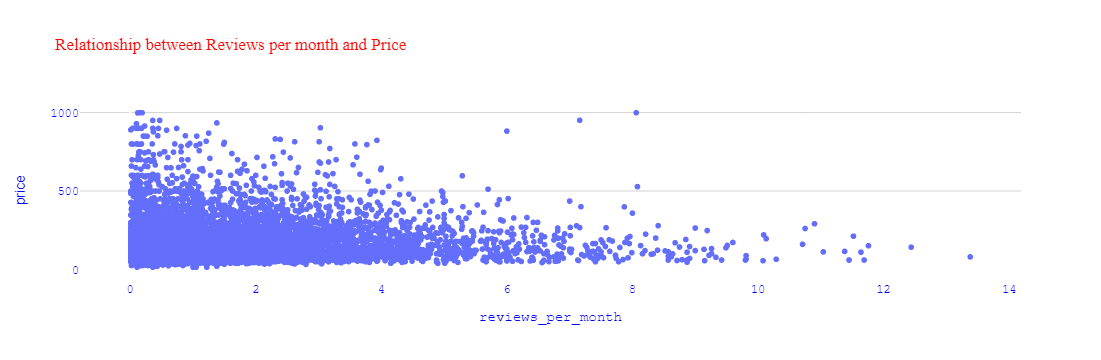

In [532]:
dfRevM = dfA[['reviews_per_month','price']]
fig = px.scatter(dfRevM, x="reviews_per_month", y="price",title=" Relationship between Reviews per month and Price")
fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    plot_bgcolor='white'
)
fig.update_yaxes(title_font_family="Arial",gridcolor='lightgrey')
fig.show()

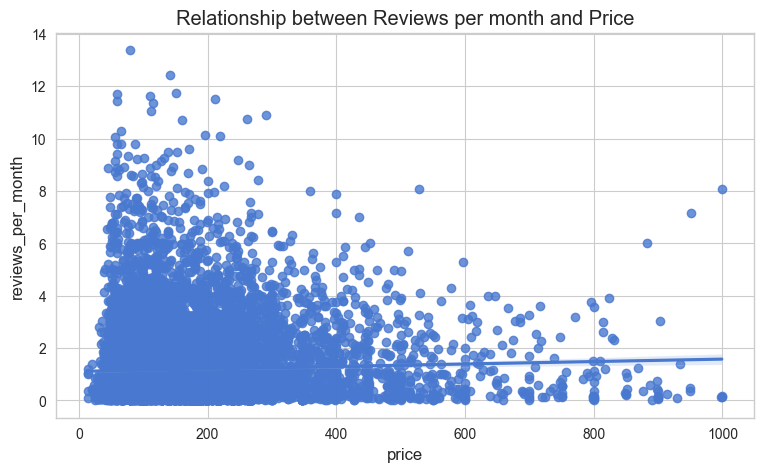

In [534]:
plt.figure(figsize=(9,5))
sns.regplot(dfRevM, y="reviews_per_month", x="price")
plt.title("Relationship between Reviews per month and Price")
plt.savefig("Q12.png")
plt.show()

Reviews per month has no real relationship with price.

### Choropleth map of toronto neighbourhoods with price.

A choropleth map displays divided geographical areas or regions that are coloured in relation to a numeric variable. 
We are going to use Folium that makes it easy to visualize data that's been manipulated in Python on an interactive leaflet map.

In [536]:
geo_df = dfA[dfA['host_location']=='Toronto, Canada'][['host_location','neighbourhood', 'price']]

In [538]:
geo_df.price.isnull().sum()

0

In [540]:
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13881 entries, 1 to 20842
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   host_location  13881 non-null  object
 1   neighbourhood  13881 non-null  object
 2   price          13881 non-null  int32 
dtypes: int32(1), object(2)
memory usage: 379.6+ KB


In [542]:
data_to_plot = geo_df[['neighbourhood','price']]
print(data_to_plot.head(2))
with open('neighbourhoods.geojson') as f:
   data_json = json.load(f)

                       neighbourhood  price
1  Waterfront Communities-The Island    268
2              Church-Yonge Corridor    197


In [544]:
map = folium.Map(location = [43.7, -79.3883], zoom_start = 11.0) 

cp = folium.Choropleth(
geo_data = data_json,
data = data_to_plot,
columns = ['neighbourhood', 'price'],
key_on = 'feature.properties.neighbourhood',
fill_color = 'Reds', fill_opacity=0.6, line_opacity=0.1,
legend_name = "price").add_to(map)
folium.LayerControl().add_to(map) 
folium.GeoJsonTooltip(['neighbourhood']).add_to(cp.geojson)
map.save("map.png")
map


As we hover on the map, we can see St.Andrew-Windfields and North St.James Town seems to be highest priced areas in Toronto area.
This map can be used to get a broad idea of the price range in different Toronto neighbourhoods.